### sample_redmagic

Drawing a population of redmagic galaxies which matches the distribution of lens candidates in $R_{{\rm eff},r}-z_{\rm{phot}}$ space.

In [1]:
# math, array manipulation, etc.
import numpy as np

import os
import sys
print(sys.version)

# timing
from timeit import default_timer
from tqdm import tqdm

import pandas as pd

import astropy.io.fits as fits
from astropy.table import Table                    # Table data structure

# plots
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

3.10.4 (main, Mar 31 2022, 03:38:35) [Clang 12.0.0 ]


/Users/aidan/opt/anaconda3/envs/gal-gal-sel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sys.path.append('/Users/aidan/Desktop/sl_project/galaxy-galaxy-sel/')

from aidan_utils import plot_prettier

# only need to run once
plot_prettier()


In [3]:
path = '/Users/aidan/Desktop/sl_project/production/'
results_filename = path + 'lens_results.csv'

results = pd.read_csv(results_filename)

photo_z = results['photo_z']
reff_r = results['halflightrad_r_50']

max_ind = np.argmax(reff_r)
#reff_r = np.delete(np.array(reff_r), max_ind)
#photo_z = np.delete(np.array(photo_z), max_ind)

print(results['sersicindex_r_16'][max_ind])
print(results['sersicindex_r_50'][max_ind])
print(results['sersicindex_r_84'][max_ind])

print(max_ind)


0.890972931320835
0.9331833098991992
0.9635123986559208
68


Text(0, 0.5, '$R_{{\\rm eff}, r}$')

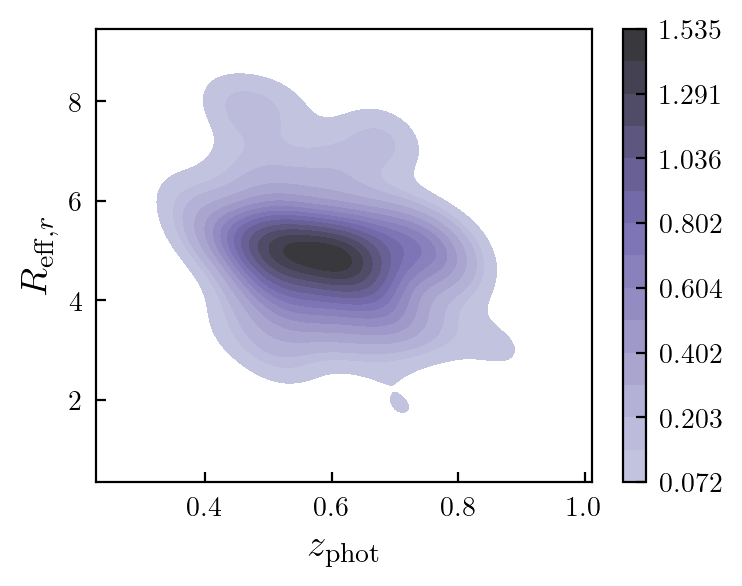

In [4]:

fig, ax = plt.subplots(1,1, figsize=(4,3))

test = sns.kdeplot(x=photo_z, y=reff_r, ax=ax
                   , cmap="Purples_d",cbar=True, shade=True
                   , levels=15
                  )
#test = ax.scatter(photo_z, reff_r)
ax.set_xlabel(r'$z_{\rm phot}$', fontsize=14)
ax.set_ylabel(r'$R_{{\rm eff}, r}$', fontsize=14)
#ax.set_ylim(0,15)


In [5]:
# let's test with scikit-learn kernel density estimation
from sklearn.neighbors import KernelDensity

data = np.array([photo_z, reff_r]).T
kde = KernelDensity().fit(data)

# Create a meshgrid, which has cells whose values are the (x,y) location at each cell
z = np.linspace(0, 3, 100)
rr = np.linspace(0, 30, 100)
zs, rrs = np.meshgrid(z, rr)

# Pair the x locations with y locations
#zrrs = np.vstack((zs.ravel(), rrs.ravel())).T

In [25]:
# if I have an array of z_phot and R_eff,r values from redmagic, then I can use the evaluation below

# evaluate
f = np.exp(kde.score_samples(zrrs))

(array([  45.,   55.,   13.,   87.,    0.,   29.,   71.,    5.,   52.,
          43.,   23.,   77.,    3.,   49.,   48.,   24.,   76.,    7.,
          54.,   39.,   32.,   68.,   15.,   85.,    4.,   48.,   48.,
          33.,   67.,   21.,   79.,   12.,   88.,    6.,   52.,   43.,
          45.,   54.,   39.,   61.,   35.,   65.,   33.,   67.,   34.,
          66.,   36.,   64.,   41.,   61.,   47.,   58.,   57.,   50.,
          86.,   24.,   76.,   37.,   69.,   55.,   58.,   81.,   38.,
          73.,   89.,   30.,   78.,   59.,   63.,   81.,   89.,   38.,
          81.,   88.,   54.,   77.,   86.,   91.,   93.,   59.,   82.,
          92.,   96.,   97.,  100.,  102.,  105.,  112.,  120.,  148.,
         117.,  131.,  169.,  150.,  189.,  217.,  304.,  652., 1212.,
        1638.]),
 array([-251.97899536, -249.48071219, -246.98242903, -244.48414587,
        -241.98586271, -239.48757955, -236.98929639, -234.49101322,
        -231.99273006, -229.4944469 , -226.99616374, -224.49788058

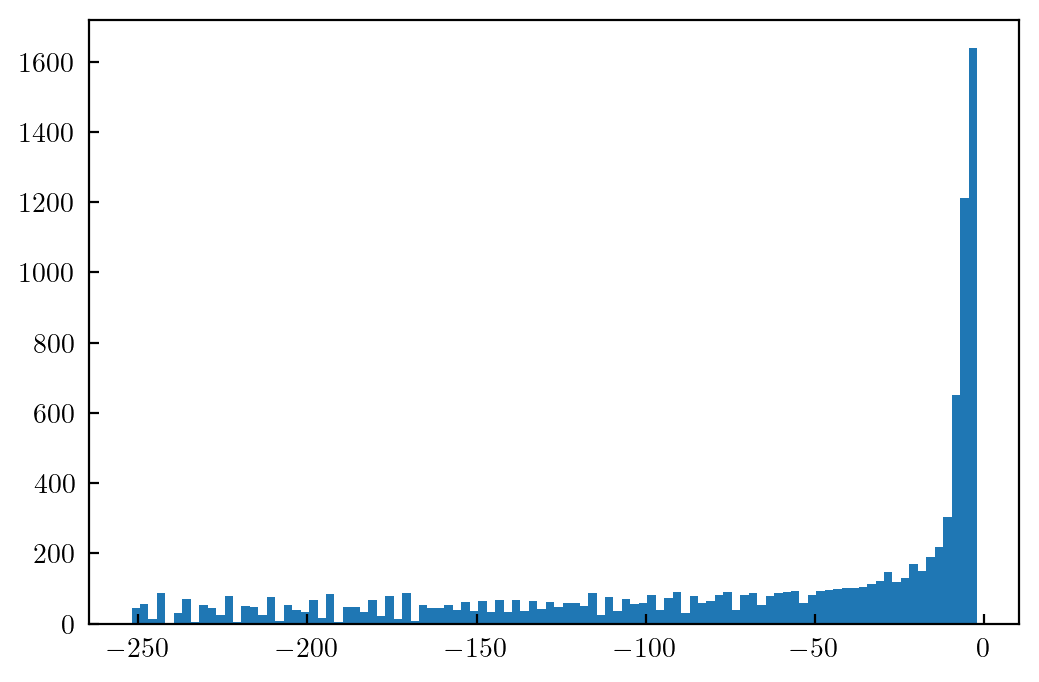

In [24]:
#pdf = kde.sample(10000)[]
plt.hist(f, bins=100)